<a href="https://colab.research.google.com/github/praveenkr3187/BPPIMTCovidResponse/blob/master/NASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler


In [0]:
data = pd.read_csv('dataset-4.csv')

In [3]:
data.head()

,State,District,Population,Area,Density,Workplaces,Residential,Retail,Grocery,Parks,Stations,Air quality,Water accessibility,Thermal anomalies,Confirmed,Active,Hotspot,Growth Ratio
0,Andhra Pradesh,Anantapur,4083315,19130.0,213,-35,23,-78,-25,-59,-47,99,90.5,0,206,98,1,1.609186
1,Andhra Pradesh,Chittoor,4170468,15152.0,275,-35,23,-78,-25,-59,-47,99,90.5,1,234,82,1,1.419674
2,Andhra Pradesh,East Godavari,5151549,10807.0,477,-35,23,-78,-25,-59,-47,99,90.5,0,147,97,1,1.934529
3,Andhra Pradesh,Guntur,4889230,11391.0,429,-35,23,-78,-25,-59,-47,99,90.5,0,452,91,1,1.223025
4,Andhra Pradesh,Krishna,4529009,8727.0,519,-35,23,-78,-25,-59,-47,99,90.5,0,445,130,1,1.339284


Dropdown(options=('Anantapur', 'Chittoor', 'East Godavari', 'Guntur', 'Krishna', 'Kurnool', 'Prakasam', 'S.P.S…

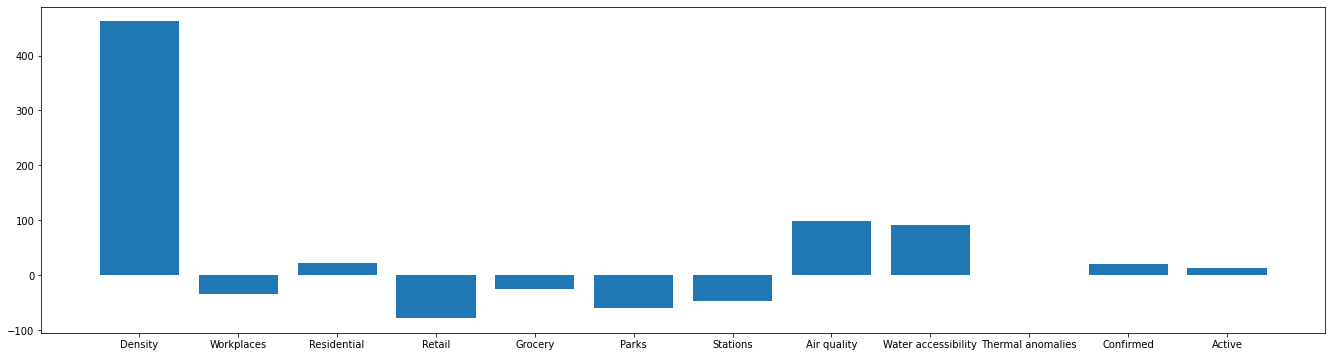

<Figure size 1656x432 with 0 Axes>

<Figure size 1656x432 with 0 Axes>

<Figure size 1656x432 with 0 Axes>

<Figure size 1656x432 with 0 Axes>

In [4]:
dropdownDistricts = widgets.Dropdown(options = data.District)
outputDistricts = widgets.Output()
def dropdown_district_eventhandler(change):
    outputDistricts.clear_output()
    with outputDistricts:
      try:
        _ = plt.figure(figsize=(23, 6))
        _ = plt.bar(data.columns[4:-2],data.values[change.new['index'],4:-2])
        _.show()
      except:
        pass

dropdownDistricts.observe(dropdown_district_eventhandler)
display(dropdownDistricts)

In [0]:
data_val = data.values


In [0]:
X = data_val[:,4:-4]  

In [0]:
Y = data_val[:,-2]
y = Y.astype('int') 

In [0]:
#normalisation
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)


**calculating feature importance**

In [11]:
model = RandomForestClassifier(n_estimators=24, criterion="entropy",max_depth=7)
model.fit(X,y)
print(model.feature_importances_)

[0.46334651 0.08040393 0.08958934 0.04481669 0.05326993 0.04490552
 0.10734031 0.04144776 0.05604751 0.01883249]


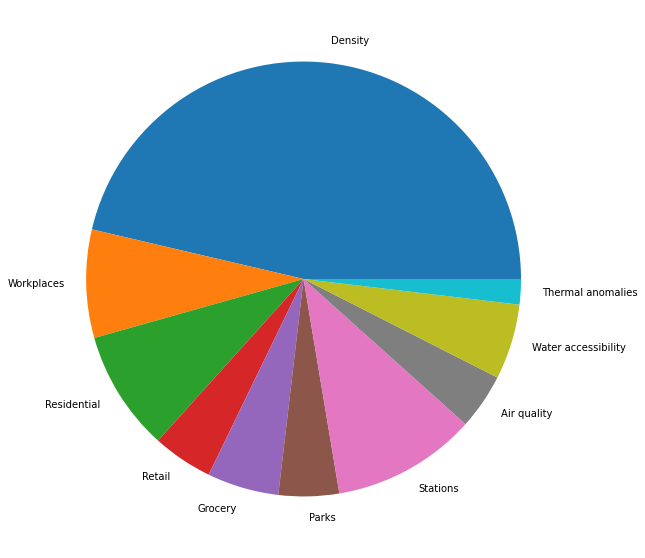

In [12]:
importance = model.feature_importances_
plt.figure(figsize=(23, 10))
_ = plt.pie(importance, labels = data.columns[4:-4])


**Calculating importance for mobility factors**




In [0]:
mobility_values = X[:,1:7]

In [14]:
model = RandomForestClassifier(n_estimators=24, criterion="entropy",max_depth=7)
model.fit(mobility_values,y)
print(model.feature_importances_)

[0.18799364 0.19014669 0.12274289 0.16912917 0.15363507 0.17635255]


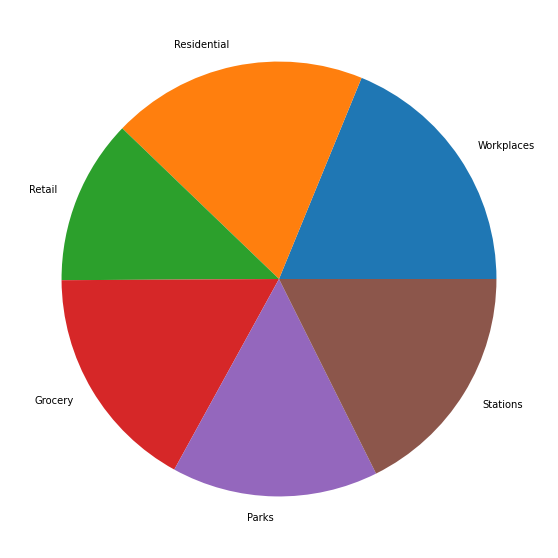

In [15]:
importance = model.feature_importances_
plt.figure(figsize=(23, 10))
_ = plt.pie(importance, labels = data.columns[5:11])

 **Univariate Selection** 



In [16]:
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(X, y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:6,:])

[3.615e+01 9.273e-02 2.351e+01 1.269e+00 2.892e+00 1.988e-01 2.888e+00
 2.262e-01 8.757e+00 1.863e-02]
[[-0.232  0.783 -0.229 -0.112  0.565]
 [-0.21   0.783 -0.229 -0.112  0.565]
 [-0.139  0.783 -0.229 -0.112  0.565]
 [-0.156  0.783 -0.229 -0.112  0.565]
 [-0.124  0.783 -0.229 -0.112  0.565]
 [-0.227  0.783 -0.229 -0.112  0.565]]


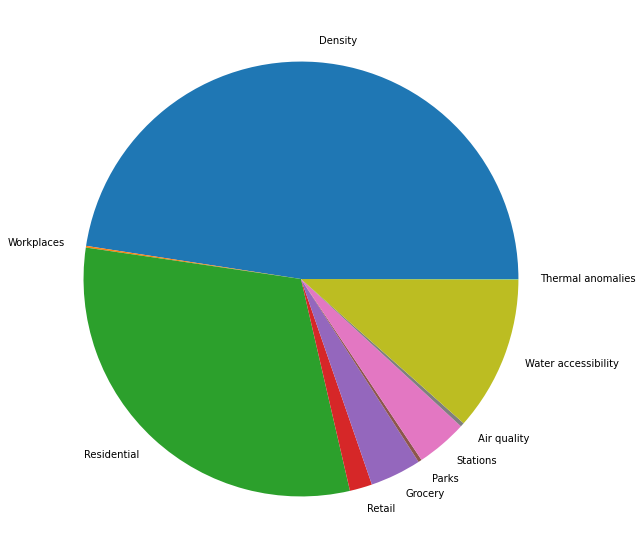

In [17]:
importance = fit.scores_
plt.figure(figsize=(23, 10))
_ = plt.pie(importance, labels = data.columns[4:-4])

**Mobility**

In [18]:
mobility_values = X[:,1:7]
test = SelectKBest(score_func=f_classif, k=3)
fit = test.fit(mobility_values, y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(mobility_values)
# summarize selected features
print(features[0:4,:])

[ 0.093 23.507  1.269  2.892  0.199  2.888]
[[ 0.783 -0.229 -0.112]
 [ 0.783 -0.229 -0.112]
 [ 0.783 -0.229 -0.112]
 [ 0.783 -0.229 -0.112]]


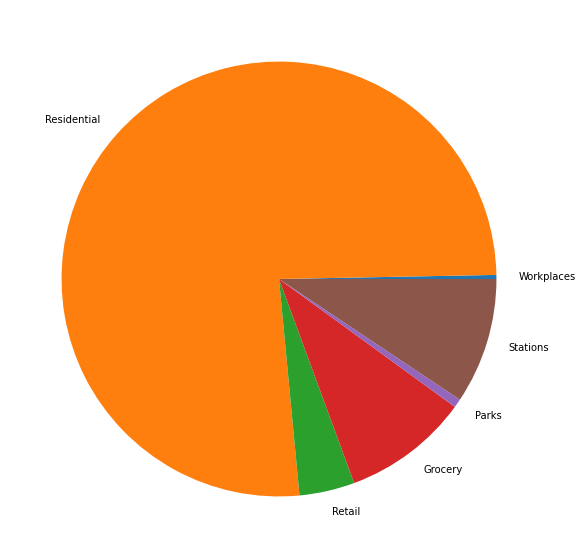

In [19]:
importance = fit.scores_
plt.figure(figsize=(23, 10))
_ = plt.pie(importance, labels = data.columns[5:11])

Predictions!

In [20]:
#logistic regression
model = LogisticRegression(random_state=42, solver='lbfgs', multi_class='ovr')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[182   9]
 [ 49   3]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       191
           1       0.25      0.06      0.09        52

    accuracy                           0.76       243
   macro avg       0.52      0.51      0.48       243
weighted avg       0.67      0.76      0.70       243



In [21]:
model = LogisticRegression(random_state=42, solver='lbfgs', multi_class='ovr')
model.fit(X_train[:,[0,2,5,6]],y_train)
y_pred = model.predict(X_test[:,[0,2,5,6]])
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[182   9]
 [ 48   4]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       191
           1       0.31      0.08      0.12        52

    accuracy                           0.77       243
   macro avg       0.55      0.51      0.49       243
weighted avg       0.69      0.77      0.71       243



random forest

In [22]:
model = RandomForestClassifier(n_estimators=24, criterion="entropy",max_depth=7)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[175  16]
 [ 35  17]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       191
           1       0.52      0.33      0.40        52

    accuracy                           0.79       243
   macro avg       0.67      0.62      0.64       243
weighted avg       0.77      0.79      0.77       243



In [23]:
model = RandomForestClassifier(n_estimators=24, criterion="entropy",max_depth=7)
model.fit(X_train[:,[0,2,5,6]],y_train)
y_pred = model.predict(X_test[:,[0,2,5,6]])
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[176  15]
 [ 32  20]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       191
           1       0.57      0.38      0.46        52

    accuracy                           0.81       243
   macro avg       0.71      0.65      0.67       243
weighted avg       0.79      0.81      0.79       243



KNN



In [24]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[162  29]
 [ 32  20]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       191
           1       0.41      0.38      0.40        52

    accuracy                           0.75       243
   macro avg       0.62      0.62      0.62       243
weighted avg       0.74      0.75      0.75       243



In [25]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train[:,[0,2,5,6]],y_train)
y_pred = model.predict(X_test[:,[0,2,5,6]])
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[163  28]
 [ 31  21]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       191
           1       0.43      0.40      0.42        52

    accuracy                           0.76       243
   macro avg       0.63      0.63      0.63       243
weighted avg       0.75      0.76      0.75       243



Naive Bayes

In [26]:
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[182   9]
 [ 48   4]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       191
           1       0.31      0.08      0.12        52

    accuracy                           0.77       243
   macro avg       0.55      0.51      0.49       243
weighted avg       0.69      0.77      0.71       243



In [27]:
model = GaussianNB()
model.fit(X_train[:,[0,2,5,6]],y_train)
y_pred = model.predict(X_test[:,[0,2,5,6]])
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[182   9]
 [ 48   4]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       191
           1       0.31      0.08      0.12        52

    accuracy                           0.77       243
   macro avg       0.55      0.51      0.49       243
weighted avg       0.69      0.77      0.71       243



SVM

In [28]:
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

NameError: ignored

In [29]:
model = svm.SVC(kernel='linear')
model.fit(X_train[:,[0,2,5,6]],y_train)
y_pred = model.predict(X_test[:,[0,2,5,6]])
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

NameError: ignored

SGD

In [30]:
model = SGDClassifier(max_iter = 200, tol=1e-3,penalty = "elasticnet")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[157  34]
 [ 29  23]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       191
           1       0.40      0.44      0.42        52

    accuracy                           0.74       243
   macro avg       0.62      0.63      0.63       243
weighted avg       0.75      0.74      0.74       243



In [31]:
model = SGDClassifier(max_iter = 200, tol=1e-3,penalty = "elasticnet")
model.fit(X_train[:,[0,2,5,6]],y_train)
y_pred = model.predict(X_test[:,[0,2,5,6]])
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[184   7]
 [ 45   7]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.88       191
           1       0.50      0.13      0.21        52

    accuracy                           0.79       243
   macro avg       0.65      0.55      0.54       243
weighted avg       0.74      0.79      0.73       243

